In [3]:
## Imports 

import sys
import numpy as np
import matplotlib
from matplotlib import pyplot as plt 

sys.path.append("../.")  

import handybeam
import handybeam.world
import handybeam.tx_array_library
import handybeam.visualise
import handybeam.tx_array
import handybeam.samplers.rectilinear_sampler
from handybeam.translator import Translator
from handybeam.solver import Solver

    

matplotlib.rcParams['figure.figsize'] = [15, 15]


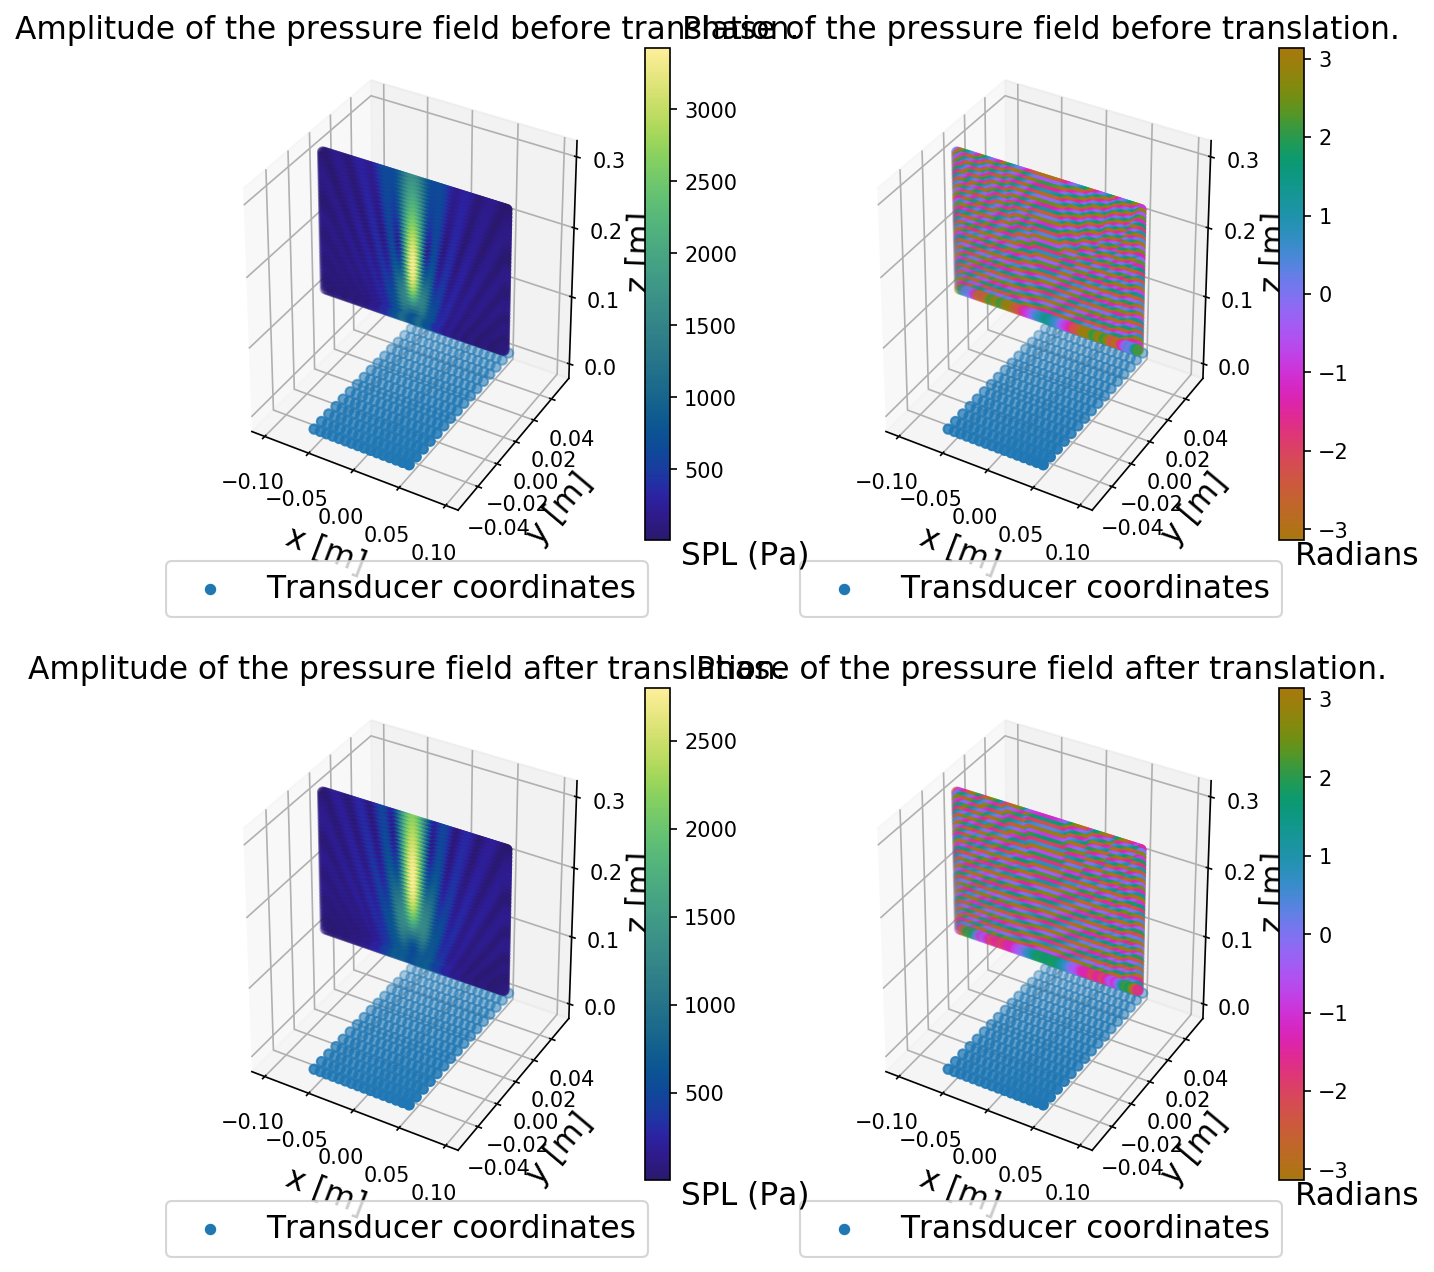

In [4]:

# Intialise the world.

world = handybeam.world.World(frequency = 40000, sound_velocity = 343)

# Add a transmitter array to the world.

world.tx_array = handybeam.tx_array_library.rectilinear(parent = world)

# Initialise solver and translator object.

solver = handybeam.solver.Solver(parent = world)

translator = Translator(parent = world)


# Set grid spacing per wavelength for rectilinear sampling grid.

grid_spacing_per_wavelength = 0.2

# Set grid extent around the origin.

grid_extent_around_origin_x = 0.1
grid_extent_around_origin_y = 0.1

# Set plane height 

focal_plane_height = 200e-3

# Add a rectilinear sampling grid to the world.

rectilinear_sampler = world.add_sampler(handybeam.samplers.rectilinear_sampler.RectilinearSampler(parent = world,
                                                                               origin = np.array((0,0,focal_plane_height)),
                                                                               normal_vector = np.array((0,1,0)),
                                                                               parallel_vector = np.array((1,0,0)),
                                                                                grid_spacing_per_wavelength = grid_spacing_per_wavelength,
                                                                               grid_extent_around_origin_x = grid_extent_around_origin_x,
                                                                               grid_extent_around_origin_y = grid_extent_around_origin_y))



# Instruct the solver to solve for the activation coefficients.

solver.single_focus_solver(x_focus = 0, y_focus = 0, z_focus = focal_plane_height) 

# Propagate the acoustic field

world.propagate()

# Save original pressure field.

original_field = rectilinear_sampler.pressure_field

# Translate array.

translator.xyz_translate(x_focus = 0,y_focus = 0, z_focus = focal_plane_height,
                         x_translate = 0,y_translate = 0, z_translate =50e-3)

# Propagate the acoustic field.

world.propagate()


# Visualise the acoustic field.

handybeam.visualise.visualise_translation(world,original_pressure_field = original_field,
                                            sampler = rectilinear_sampler,figsize=([10,10]))
